In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
root_file_path = "/data/cgarcia_2002/WCTE/data/WCTE_offline_R2385S0P0.root"

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree = file["WCTEReadoutWindows"]  
#tree.show()
total_events = tree.num_entries
tree.keys()

# Load the branch into a NumPy array



['window_time',
 'start_counter',
 'run_id',
 'sub_run_id',
 'spill_counter',
 'event_number',
 'readout_number',
 'trigger_types',
 'trigger_times',
 'led_gains',
 'led_dacsettings',
 'led_ids',
 'led_card_ids',
 'led_slot_numbers',
 'led_event_types',
 'led_types',
 'led_sequence_numbers',
 'led_counters',
 'hit_mpmt_card_ids',
 'hit_pmt_channel_ids',
 'hit_mpmt_slot_ids',
 'hit_pmt_position_ids',
 'hit_pmt_charges',
 'hit_pmt_times',
 'pmt_waveform_mpmt_card_ids',
 'pmt_waveform_pmt_channel_ids',
 'pmt_waveform_mpmt_slot_ids',
 'pmt_waveform_pmt_position_ids',
 'pmt_waveform_times',
 'pmt_waveforms',
 'beamline_pmt_qdc_charges',
 'beamline_pmt_tdc_times',
 'beamline_pmt_qdc_ids',
 'beamline_pmt_tdc_ids']

In [3]:
values = tree["hit_pmt_times"].array(library="np")  # e.g., "eventID"
#print(values) 

final_elements = []

for x in values:

    print(len(x)) 
    #final_elements.append(x[1])
    #print(x[1])



1231
1953
2354
1101
1187
1978
1303
1139
1698
1221
1127
1180
2072
1373
2002
2397
1124
1491
1236
2076
1154
1219
1182
1225
1990
1218
1206
1084
975
1154
1805
1243
1229
1198
1182
1224
1168
1142
2365
1866
1218
1262
1951
822
1209
1159
1548
1158
1258
1219
1359
1156
1139
1365
1148
1075
1382
1157
3163
1159
1110
1246
1592
1286
2664
1237
1734
1070
1097
1861
1148
1265
1082
1209
1146
1164
1264
1092
1013
1132
2126
1559
1072
1281
1582
1870
1200
1097
1185
2087
3184
1109
1188
1099
1234
1100
1138
1230
1171
1165
1968
1166
1193
2243
1145
1140
1590
1121
1103
1521
2414
1218
1111
1143
1183
1084
1164
1216
1090
1258
2265
1028
1218
1363
1110
1136
1163
1821
2038
1177
1131
2143
1196
1235
1062
1112
1071
1192
1238
1436
1221
1043
1716
2568
1523
1215
1056
1223
1114
1390
1308
1069
1912
1090
1208
2465
1301
2171
1168
1124
1124
1785
1122
1206
1167
1220
1290
1106
1249
1612
1142
1301
1206
1311
1093
1144
2276
1135
1243
1197
1205
1132
1393
1106
1043
1554
1510
1139
1613
1130
1141
1691
1097
1842
1127
1294
1280
1242
1349
1633
13

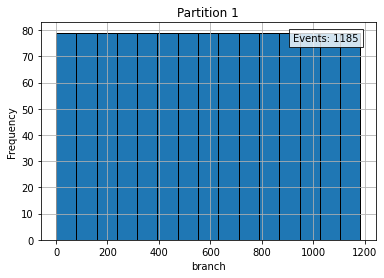

[   0    1    2 ... 1182 1183 1184]


In [4]:
values = tree["event_number"].array(library="np")  # e.g., "eventID"
# Plot a histogram
plt.hist(values, bins=15, edgecolor="black")
plt.xlabel("branch")
plt.ylabel("Frequency")
plt.grid(True)
plt.text(0.95, 0.95, f"Events: {total_events}", 
         horizontalalignment='right', verticalalignment='top',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.title("Partition 1")
#plt.tight_layout()
plt.show()
#plt.savefig("Plots_histograms/P1/window_time.png", facecolor='white')
print(values)


In [5]:
typenames_dict = tree.typenames()

for branch_name, type_str in typenames_dict.items():
    print(f"{branch_name}: {type_str}")

window_time: double
start_counter: unknown
run_id: int32_t
sub_run_id: int32_t
spill_counter: int32_t
event_number: int32_t
readout_number: int32_t
trigger_types: std::vector<int32_t>
trigger_times: std::vector<double>
led_gains: std::vector<float>
led_dacsettings: std::vector<float>
led_ids: std::vector<int32_t>
led_card_ids: std::vector<int32_t>
led_slot_numbers: std::vector<int32_t>
led_event_types: std::vector<int32_t>
led_types: std::vector<int32_t>
led_sequence_numbers: std::vector<int32_t>
led_counters: std::vector<int32_t>
hit_mpmt_card_ids: std::vector<int32_t>
hit_pmt_channel_ids: std::vector<int32_t>
hit_mpmt_slot_ids: std::vector<int32_t>
hit_pmt_position_ids: std::vector<int32_t>
hit_pmt_charges: std::vector<float>
hit_pmt_times: std::vector<double>
pmt_waveform_mpmt_card_ids: std::vector<int32_t>
pmt_waveform_pmt_channel_ids: std::vector<int32_t>
pmt_waveform_mpmt_slot_ids: std::vector<int32_t>
pmt_waveform_pmt_position_ids: std::vector<int32_t>
pmt_waveform_times: std::v

In [6]:
times_branch = tree["hit_pmt_times"].array(library="np")
event_number_branch = tree["event_number"].array(library="np")

range_hits = 1500
times_array = np.arange(0, 270000+1, range_hits, dtype=int)
nHits = np.zeros((tree.num_entries, len(times_array)))


for event, event_number in zip(times_branch, event_number_branch):
    
    div = event//range_hits
    res = event%range_hits

    for i, res_value in enumerate(res):
        if res_value != 0:
            div[i] += 1

    for n in div:
        nHits[event_number, int(n)-1] +=1





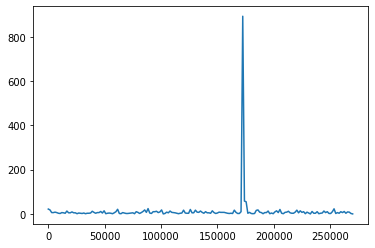

In [7]:
#PARA PLOTEAR CUALQUIER EVENTO
plt.figure()
plt.plot(times_array, nHits[1182,::])
plt.show()

In [8]:
# Example array
arr = nHits[435,::]

# Find index of max
max_idx = np.argmax(arr)
max_val = arr[max_idx]

# Define how many neighbors on each side you want
window = 2  # gives you 5 total: [i-2, i-1, i, i+1, i+2]

# Handle edges
start = max(0, max_idx - window)
end = min(len(arr), max_idx + window + 1)

# Extract neighbors
neighbors = arr[start:end]

print(f"Max value: {max_val} at index {max_idx}")
print(f"Neighbors: {neighbors}")


Max value: 381.0 at index 96
Neighbors: [ 23.   4. 381.   7.  26.]


In [9]:
df_nHits = pd.DataFrame(nHits, columns=[str(t) for t in times_array])
df_nHits.insert(0, "event_number", event_number_branch)
df_nHits.to_hdf("nHits_DataFrame_P0.h5", key="df", mode="w")


[[0. 0. 0. 0. 0. 0. 0.]]
[0 2 5] [1000    0  500]
[1 2 6]
0 0
0 1
0 5


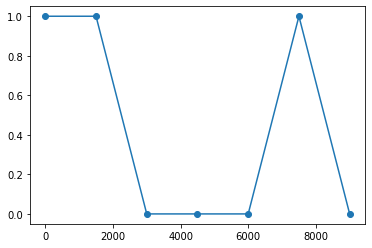

[[1. 1. 0. 0. 0. 1. 0.]]


In [10]:
times_branch = np.array([[1000, 3000, 8000]])
event_number_branch = [0]

range_hits = 1500
times_array = np.arange(0, 9000+1, range_hits, dtype=int)
nHits = np.zeros((1, len(times_array)))
print(nHits)

for event, event_number in zip(times_branch, event_number_branch):

    div = event//range_hits
    res = event%range_hits

    print(div, res)

    for i, res_value in enumerate(res):
        if res_value != 0:
            div[i] += 1
    print(div)
    for n in div:
        print(event_number, int(n)-1)
        nHits[event_number, int(n)-1] +=1

plt.figure()
plt.plot(times_array, nHits[0,::], marker='o')
plt.show()
print(nHits)